In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
import skfuzzy as fuzz
import array as arr
import pandas as pd

In [65]:
def NúmeroDeGruposÓptimo (filename,maxConjuntos):
    df = pd.read_csv(filename,keep_default_na = False,dtype = float)
    #print(df);
    data=np.array([df['peso_inicial'],df['peso_final'],df['edad'],df['ganancia_mensual']])
    #data_in_file = np.loadtxt(NombreDeArchivo).T;
    conjuntos=np.arange(2,maxConjuntos+1);
    FP=np.zeros(np.shape(conjuntos));
    m=2;
    error=1e-9;
    max_iter=200;
    for conj in conjuntos:
        cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(data, conj, m, error, max_iter);
        FP[conj-2]=fpc;
    return np.argmax(FP)+2;

0     20.0
1      2.0
2     10.0
3      4.0
4     11.0
5      4.0
6     20.0
7      4.0
8     11.0
9      5.0
10    15.0
11     4.0
12    14.0
13     6.0
14    11.0
15    13.0
16     8.0
17     4.0
18    12.0
19    12.0
dtype: float64
[[11.39832076 12.9826875 ]
 [ 7.45708436 17.03734247]]
[0.61477462 0.38522538]


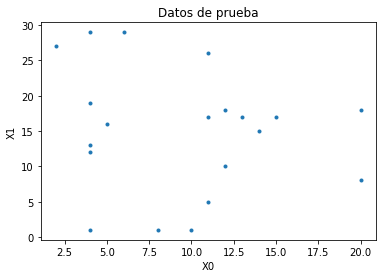

In [70]:
filename = "datos3.csv";
df = pd.read_csv(filename,keep_default_na = False,dtype = float)
#print(df);
df2 = df['peso_final'] - df['peso_inicial']
print(df2)
#data=np.array([df['peso_inicial'],df['peso_final'],df['edad'],df['ganancia_mensual']])
data=np.array([df2,df['edad']])
                          
#print(data)
#data_in_file =np.loadtxt(data).T
#print(data_in_file)
plt.title("Datos de prueba");
plt.xlabel("X0");
plt.ylabel("X1");
plt.plot(data[0],data[1],'.')
x=np.arange(1,21);
conjuntos=2;
#conjuntos = NúmeroDeGruposÓptimo(filename,5);
m=2;
error=1e-9;
max_iter=5;
cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(data, conjuntos, m, error, max_iter);
print(cntr);
print(u.T[0])
pertenencia = pd.DataFrame(u.T,columns=['grupo1','grupo2'])
pertenencia.to_csv('grados_pertenencia.csv',index=0)

